In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV']

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-25 - 69'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 2) & (stat['21-mean'] > 0.4) & (stat['21-shrp'] > 1.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
ITM,64,1.170656,0.428036,2.345568,0.438740
VTEB,64,1.026829,0.383836,2.240962,0.333713
MUB,64,1.002872,0.382374,2.186876,0.409122
HYD,64,1.182910,0.465425,2.183474,0.409066
CMF,64,1.036600,0.407305,2.135830,0.381602
PZA,64,1.206245,0.507330,2.049116,0.506035
TFI,64,1.058820,0.450706,1.979458,0.490727
IGIB,64,1.452300,0.785337,1.637046,0.594408
VCIT,64,1.455493,0.827998,1.556558,0.502684


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['ITM'] -1.4578204966672863 0.6 0.0877479859997807 2.345568482667067
['ITM', 'IGIB'] -1.7393476483671098 0.1486448194326706 0.10331474889550976 1.99130721669529
['VTEB', 'IGIB'] -1.7427158446929296 0.1034758430648286 0.09281206356855046 1.9390037513263088
['VTEB', 'VCLT'] -1.7448490832093273 -0.05917221490567792 0.13701353442284522 1.8226904027264945
['MUB', 'IGIB'] -1.7955913510227122 0.01601640767319079 0.10035297327188715 1.91196073196779
['MUB', 'VCLT'] -1.8006595077052456 -0.14956656846345173 0.1445544441261819 1.7956473833679758
['PZA', 'IGIB'] -1.8536984971377883 -0.12066201268154131 0.11004429331188784 1.8430807777681348


['PZA', 'IGIB']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['PZA', 'IGIB'], sr=0)

['PZA', 'IGIB'] -0.010617719369653472 -0.12066201268154131 0.11004429331188784 1.8430807777681348
['PZA', 'IGIB', 'ITM', 'VTEB'] -0.2274799876674965 0.47887521534014893 0.09364479699235462 2.0681728975331106
['PZA', 'IGIB', 'ITM', 'MUB'] -0.2354450059712379 0.46713974218473914 0.09741525184402297 2.054651387853851
['PZA', 'IGIB', 'ITM', 'TFI'] -0.2373849237354554 0.46111960595161916 0.10149547031292547 2.0027970554551224
['PZA', 'IGIB', 'ITM', 'VCIT'] -0.3714575337060502 0.32644914698099337 0.10209331931295644 1.8970719132378648
['PZA', 'IGIB', 'ITM', 'VCLT'] -0.4052974539806834 0.26592228948847046 0.12878025653084618 1.8590373229318053
['PZA', 'IGIB', 'ITM', 'LQD'] -0.40638446829177705 0.2794873030230834 0.11412822868513958 1.8556566105376657
['PZA', 'IGIB', 'VTEB', 'VCLT'] -0.42040282205960006 0.25606826407303346 0.12352891386736653 1.8328855902473147
['PZA', 'IGIB', 'VTEB', 'LQD'] -0.4210136377323973 0.27010947624594284 0.10887688602165993 1.829504877853175
['PZA', 'IGIB', 'MUB', 'V

['PZA', 'IGIB', 'MUB', 'LQD']

In [6]:
quote.setup_mask(['PZA', 'IGIB'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 PZA     0.685812
 IGIB    0.314188
 dtype: float64, 1.2836, 0.4015)

In [7]:
quote.setup_mask(['MUB', 'LQD'])
quote.find_optimal_ratio(21, 1)

(Symbols
 MUB    0.869416
 LQD    0.130584
 dtype: float64, 1.0949, 0.3482)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,1.206601,0.375592,0.328642,1.068668,1.221096,1.465818,1.977714,2.768788,0.445192
MUB,64.0,1.002872,0.382374,0.256944,0.710296,0.962051,1.292331,1.685346,2.186876,0.409122
PZA,64.0,1.206245,0.507330,0.276890,0.764561,1.179209,1.568200,2.136537,2.049116,0.506035
IGIB,64.0,1.452300,0.785337,0.296551,0.766460,1.484765,1.918528,3.412148,1.637046,0.594408
LQD,64.0,1.707643,1.107902,0.001661,0.739684,1.750669,2.445405,4.536975,1.390896,0.743382


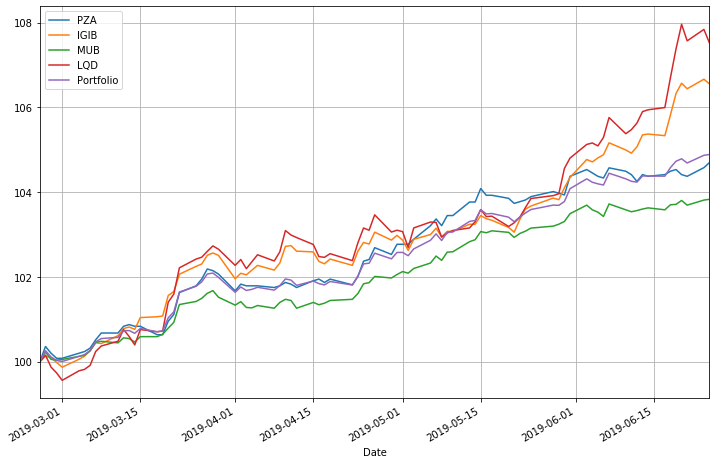

In [8]:
%pylab inline
quote.setup_mask(['PZA', 'IGIB', 'MUB', 'LQD'])
quote.graph(21, {'PZA': .41, 'IGIB': .19, 'MUB': .35, 'LQD': .05})